In [1]:
# Example of multiple variable linear regression using Tensorflow.
# Michael Timbes

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
data_frame = np.asarray(pd.read_csv('realestate.csv', sep=','))

In [3]:
def normalize(x):
    """
    Normalizes an input vector.
    """
    mu = np.mean(x)
    st = np.std(x)
    for i in range(len(x)):
        x[i] = ((x[i]-mu)/st)
    return x

In [4]:
# Data Description:
# data_frame[:,0]- MLS# Unique ID
# data_frame[:,1]- Location City, Town
# data_frame[:,2]- Price $
# data_frame[:,3]- # of Bedrooms
# data_frame[:,4]- Size in sq. ft.
# data_frame[:,5]- Price/sq.ft.
# data_frame[:,6]- Type of sale: Short Sale, Foreclosure, Regular
#################################################################
#
# Data Preparation
X0 = data_frame[:,4]
X1 = data_frame[:,5]
Ys = data_frame[:,2]
num_tr = len(X0)
# Prep-X
X_tr = np.zeros([num_tr,2])
X_tr[:,0] = normalize(X0)
X_tr[:,1] = normalize(X1)
#X_tr[:,0] = X0
#X_tr[:,1] = X1
print(X_tr.shape)
# Prep-Y
Y_tr = np.zeros([1,num_tr])
Y_tr[0,:] = Ys

(781, 2)


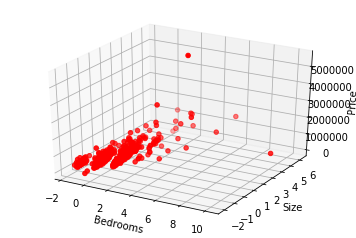

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X0,X1,Ys,c='r', marker='o')
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Size')
ax.set_zlabel('Price')
plt.show()

In [6]:
# Model
alpha = 0.05
n = 2
# Theta Values
W = tf.Variable(np.ones([n,1]))
b = tf.Variable(np.ones([1]))
# Input Parameter x
X = tf.placeholder(tf.float64,[None,n])
# Input Parameter y
Y = tf.placeholder(tf.float64,[None,1])

# Linear Model
h = tf.matmul(X,W) + b

# Define Cost Variable
cost = tf.reduce_sum(tf.square(h - Y))

# Define Optimization Object
optimizationobj = tf.train.GradientDescentOptimizer(alpha)
improve = optimizationobj.minimize(cost)

In [7]:
# Training Phase
global_init = tf.global_variables_initializer()
session = tf.Session()
session.run(global_init) # Activate Envir
X_dum = np.zeros([1,2])
Y_dum = np.zeros([1,1])
# Train Loop
for i in range(500):
    for j in range(0,num_tr,1):
        X_dum[0,0] = X_tr[j,0]
        X_dum[0,1] = X_tr[j,1]
        Y_dum[0,0] = Y_tr[0,j]
    session.run(improve,{X:X_dum,Y:Y_dum})



In [8]:
for j in range(num_tr):
        X_dum[0,0] = X_tr[j,0]
        X_dum[0,1] = X_tr[j,1]
        Y_dum[0,0] = Y_tr[0,j]
        b_reg, W_reg, loss_result = session.run([b,W,cost],feed_dict={X:X_dum,Y:Y_dum})
print("W = %8.3f, %8.3f "% (W_reg[0],W_reg[1]))
print("B = %8.3f "% (b_reg))
print("Total Loss: %8.3e "% (loss_result))

W = 383366.301, 391635.600 
B = 503610.189 
Total Loss: 5.421e-20 


In [9]:
# Prediction Test
tval = 4
X_dum[0,0] = X0[tval]
X_dum[0,1] = X1[tval]
H = np.matmul(X_dum,W_reg)+ b_reg
print("Predicted: %8.3f Actual: %8.3f "% (H,Y_tr[0,tval]))
acc = abs(H - Y_tr[0,tval])/abs(Y_tr[0,tval])
print("Accuracy:%8.3f   Difference: %8.3f"%(100*acc,abs(H-Y_tr[0,tval])))

Predicted: -352779.241 Actual: 109900.000 
Accuracy: 421.000   Difference: 462679.241
